In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../EDA/numData.csv')
Y = pd.read_csv('../EDA/y.csv')

In [3]:
dataset = dataset.merge(Y, how='left', on=["country","year"])

In [4]:
X_AfterColdWar = dataset[dataset["year"] > 1990]

In [5]:
X_beforeColdWar = dataset[dataset["year"] < 1990]

In [4]:
X_without = dataset.drop(columns=["year","country"], axis=0)

In [5]:
bigMissing = X_without.isna().sum()[(X_without.isna().sum() / X_without.shape[0]) > 0.8].keys()
X_without = X_without.drop(columns=bigMissing, axis=0)

In [6]:
X_without = X_without.replace(np.inf, 0)
X_without = X_without.replace(-np.inf, 0)
X_without = X_without.fillna(0)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = StandardScaler().fit_transform(X_without)

pca = PCA()
principalComponents = pca.fit_transform(X)

PCA_components = pd.DataFrame(principalComponents)

1


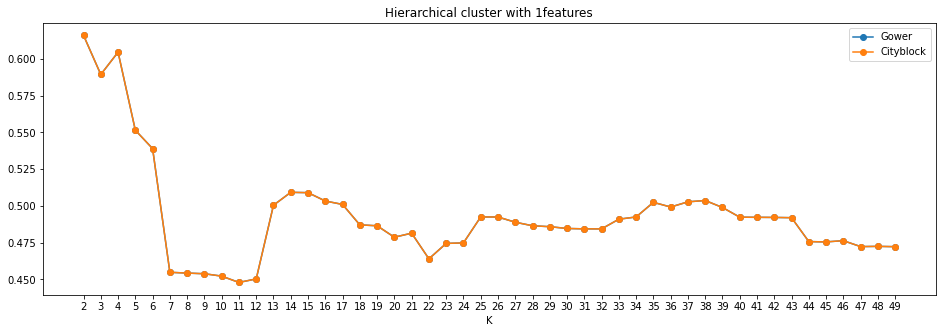

2


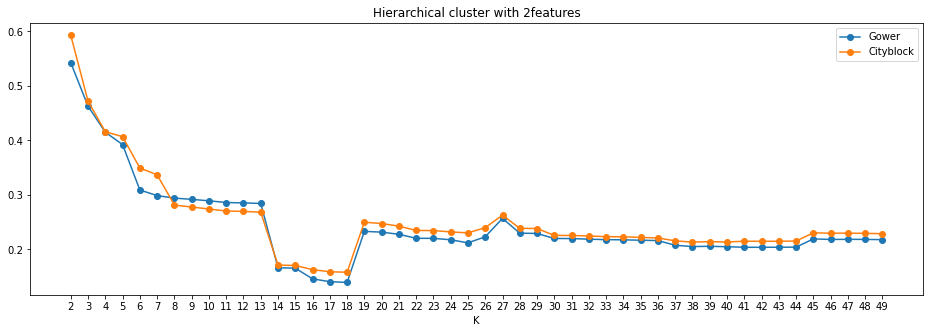

3


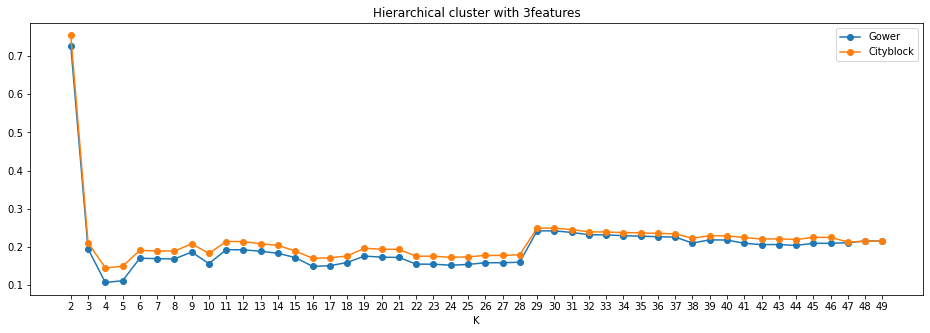

4


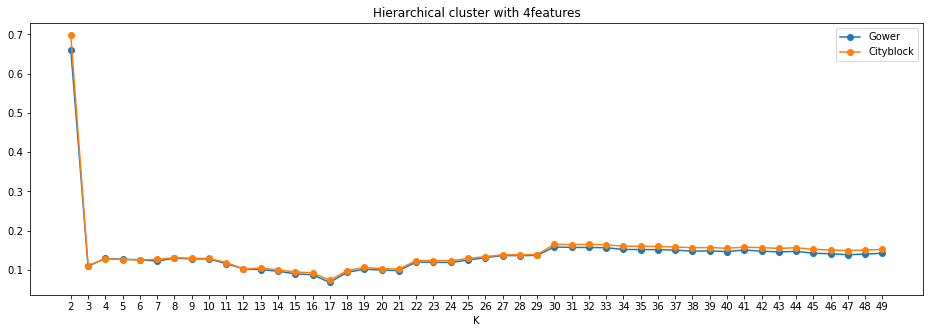

5


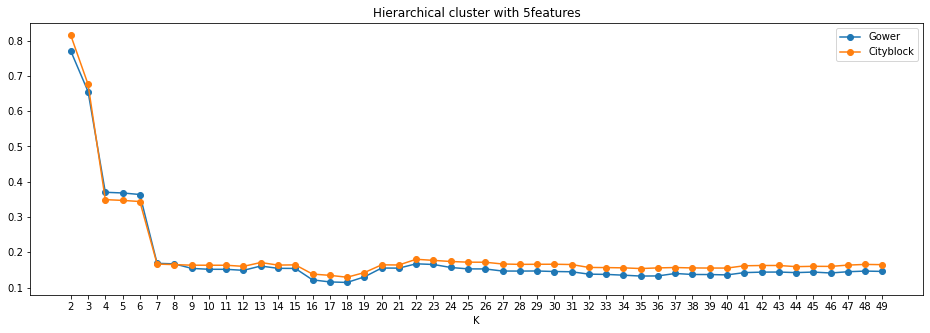

6


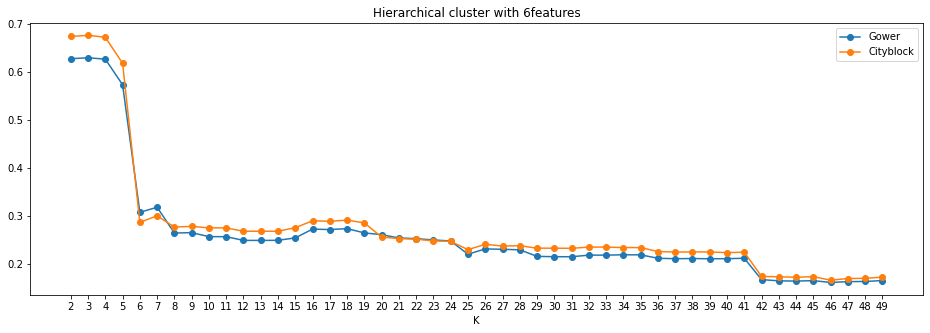

7


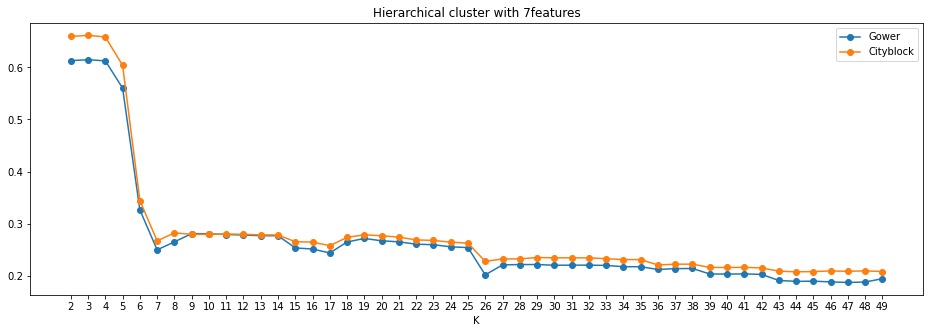

8


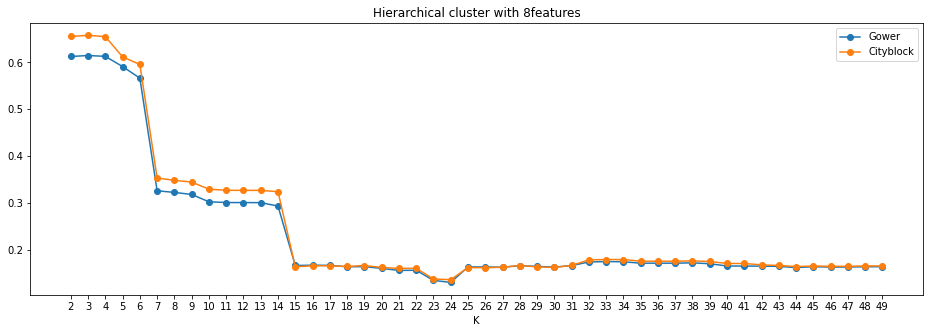

9


KeyboardInterrupt: 

In [13]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import scipy.cluster.hierarchy as shc
import gower
from sklearn.metrics import  silhouette_score

results = dict()
k_cand = range(2,50)
# k_cand.extend(list(np.arange(50,1000,50)))

for features in range(1,12):
    print(features)
    gd = gower.gower_matrix(PCA_components.iloc[:,:features])
    cluster = shc.linkage(PCA_components.iloc[:,:features], method='complete')

    for k in k_cand:
        cluster_array = fcluster(cluster, k, criterion='maxclust')
        score0 = silhouette_score(gd, cluster_array, metric='precomputed')
        score1 = silhouette_score(PCA_components.iloc[:,:features], cluster_array,metric='cityblock')
        results[k] = {'k':cluster_array,'s0':score0,'s1':score1}
        
    fig,axs = plt.subplots(1,1,figsize=(16,5))
    axs.plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Gower')
    axs.plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Cityblock')
    # axs.set_xlim(1,451)
    axs.set_xticks(k_cand)
    axs.set_xlabel('K')
    axs.legend()
    plt.title('Hierarchical cluster with '+ str(features)+ 'features')
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = StandardScaler().fit_transform(X_without)

pca = PCA()
principalComponents = pca.fit_transform(X)

PCA_components = pd.DataFrame(principalComponents)

In [10]:
from sklearn import mixture

components = 9
features = 5

gmm = mixture.GaussianMixture(n_components=components, covariance_type='full')
labels = gmm.fit_predict(PCA_components.iloc[:,:features])

X_without["gmmLabels-"+str(components)+str(features)] = labels
dataset["gmmLabels-"+str(components)+str(features)] = labels


In [11]:
from sklearn.cluster import KMeans

components = 9
features = 5

gmm = KMeans(n_clusters=components)
labelsKmm = gmm.fit_predict(PCA_components.iloc[:,:features])

X_without["kmmLabels-"+str(components)+str(features)] = labelsKmm
dataset["kmmLabels-"+str(components)+str(features)] = labelsKmm

In [12]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import scipy.cluster.hierarchy as shc

components = 9 
features = 5

cluster = shc.linkage(PCA_components.iloc[:,:features], method='complete')
cluster_array = fcluster(cluster, 15, criterion='maxclust')

X_without["LinkLabels-"+str(components)+str(features)] = cluster_array
dataset["LinkLabels-"+str(components)+str(features)] = cluster_array


In [13]:
dataset.to_csv("cheat.csv")

In [14]:
checkingMatrix = dataset.iloc[:,-12:]

In [15]:
checkingMatrix

,democ,autoc,polity,polity2,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,gmmLabels-95,kmmLabels-95,LinkLabels-95
0,0.0,1.0,0.0,0.0,0.081000,0.068000,0.028000,0.061000,0.066,1,7,9
1,0.6,0.1,1.5,1.5,0.482667,0.337667,0.310333,0.427667,0.367,8,7,9
2,1.0,0.0,2.0,2.0,0.824000,0.766000,0.582000,0.727000,0.666,0,0,9
3,1.0,0.0,2.0,2.0,0.836000,0.693000,0.592000,0.608000,0.725,0,0,9
4,NaN,NaN,NaN,NaN,0.108000,0.060000,0.066000,0.025000,0.052,1,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...
14134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,7,6
14135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,6
14136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1,15
14137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,9


In [16]:
import sklearn.metrics as skMetrics

labels = checkingMatrix.iloc[:,-3:]

zerosArray = np.zeros((3,3))


for x in range(3):
    for y in range(3):
        randIndex = skMetrics.adjusted_rand_score(labels.iloc[:,x],labels.iloc[:,y])
        zerosArray[x][y] = randIndex

np.savetxt("rand.csv", zerosArray, delimiter=",", fmt='%s')

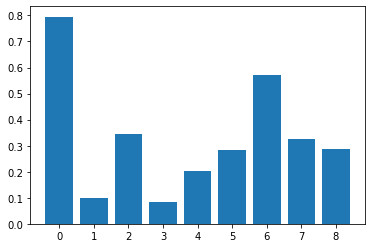

LeveneResult(statistic=289.58176223999163, pvalue=0.0)
NormaltestResult(statistic=224.2614400798367, pvalue=2.0056125328890438e-49) LeveneResult(statistic=289.58176223999163, pvalue=0.0)
LeveneResult(statistic=9.54077400513012, pvalue=0.0020353389293101217)
Compare v2x_libdem, of cluster 0  against: 1 : Ttest_indResult(statistic=250.92418711327738, pvalue=0.0)

LeveneResult(statistic=636.1565982404663, pvalue=1.1855774274404953e-115)
Compare v2x_libdem, of cluster 0  against: 2 : Ttest_indResult(statistic=57.40727747833467, pvalue=0.0)

LeveneResult(statistic=16.38603939893435, pvalue=5.50868626206816e-05)
Compare v2x_libdem, of cluster 0  against: 3 : Ttest_indResult(statistic=138.10926791320148, pvalue=0.0)

LeveneResult(statistic=390.71267191132694, pvalue=9.79273774872638e-82)
Compare v2x_libdem, of cluster 0  against: 4 : Ttest_indResult(statistic=124.50630870491445, pvalue=0.0)

LeveneResult(statistic=682.9576624552622, pvalue=3.211293068588965e-127)
Compare v2x_libdem, of cluste

PermissionError: [Errno 13] Permission denied: 'foo.csv'

In [17]:
import scipy.stats as scStat

setToCompare = "gmmLabels-95"
clusters = len(checkingMatrix[setToCompare].unique())
democracyScore = "v2x_libdem"

clusters = len(checkingMatrix[setToCompare].unique())

bars = [np.mean(checkingMatrix[checkingMatrix[setToCompare]==i][democracyScore].dropna().values) for i in range(clusters)]
plt.bar(range(clusters),bars)
plt.xticks(range(clusters))
plt.show()


# zeroArray = np.zeros((clusters+1,clusters+1))
zeroArray = [[0]*(clusters+1)]*(clusters+1)

barlett = [checkingMatrix[checkingMatrix[setToCompare]==i][democracyScore].dropna().values for i in range(clusters)]
barlettTest = scStat.levene(*barlett)

print(barlettTest)

for i in range(clusters):
    # print(len(checkingMatrix[checkingMatrix[setToCompare]==i]["v2x_partipdem"]))
    compareSet = checkingMatrix[checkingMatrix[setToCompare]==i][democracyScore].dropna().values
    if len(compareSet) > 8:
        normality_v2X_PartiDem = scStat.normaltest(compareSet)
        print(normality_v2X_PartiDem, barlettTest)
        for z in range(clusters):
            tTest = 0
            if i != z:
                compareSet2 = checkingMatrix[checkingMatrix[setToCompare]==z][democracyScore].dropna().values
                levene = scStat.levene(compareSet,compareSet2)
                print(levene)

                if len(compareSet2) > 8:
                    tTest = scStat.ttest_ind(compareSet,compareSet2)
                    zeroArray[i][z] = str(tTest[1])+ ";" + str(levene[1])
                    print("Compare "+ democracyScore +", of cluster", i, " against:", z, ":", tTest)
                    print("")
            else:
                zeroArray[i][z] = 1
    print("")

save = np.array(zeroArray)
np.savetxt("foo.csv", save, delimiter=",", fmt='%s')